In [1]:
import numpy as np
import pandas 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pynbody 
from sklearn.metrics import confusion_matrix

import torch 
import torch.nn as nn
import torch.utils.data as data
import torch.nn.functional as F
from nflows import transforms
from torchvision.transforms.functional import resize
from nflows.transforms.base import Transform

# Put cataloge (AHF) and simulation (output) in the same folder

# Load the simuation

In [2]:
s = pynbody.load('data/g8.26e11/snap_2000/output/8.26e11.02000') #this is a SimSnap
h = s.halos() #this is a cataloghue

In [3]:
print('number of particles in h[1]:', len(h[1]))
print('number of particles in h[-1]:', len(h[len(h)]))

number of particles in h[1]: 9579299
number of particles in h[-1]: 50


In [4]:
s.physical_units()

In [5]:
h1 = h[1]
print('len star', len(h1.s), '\t', 'len gas', len(h1.g), '\t', 'len dark matter', len(h1.d))
print('total number of particles', (len(h1.s) + len(h1.g) + len(h1.d)))

len star 4171413 	 len gas 1665173 	 len dark matter 3742713
total number of particles 9579299


# Plot 
halos must be centered before plotting

### Plot of h1 (main halo)

SimArray([[  1.3351154,   1.313982 ,   1.2928486, ..., 208.47331  ,
           187.73068  , 166.98807  ],
          [  1.4290063,   1.4080201,   1.3870337, ..., 225.02615  ,
           201.91258  , 178.79904  ],
          [  1.5228974,   1.5020579,   1.481219 , ..., 241.57896  ,
           216.0945   , 190.61     ],
          ...,
          [223.71011  , 263.82452  , 303.9389   , ...,   3.347186 ,
             3.2948637,   3.2425416],
          [217.81757  , 257.96603  , 298.1145   , ...,   3.4817414,
             3.4265833,   3.3714247],
          [211.925    , 252.10754  , 292.2901   , ...,   3.616297 ,
             3.5583024,   3.500308 ]], dtype=float32, 'Msol kpc**-3')

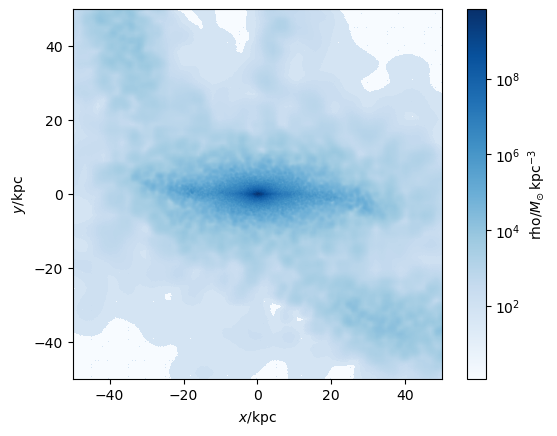

In [6]:
#Edge on
pynbody.analysis.halo.center(h1,mode='hyb')
pynbody.analysis.angmom.sideon(h[1])
pynbody.plot.image(h1.s, width=100, cmap='Blues')

SimArray([[ 8.900189 ,  9.432245 ,  9.964299 , ..., 36.92482  ,
           34.777836 , 32.630848 ],
          [ 8.902872 ,  9.461107 , 10.0193405, ..., 36.851887 ,
           34.690918 , 32.529934 ],
          [ 8.905556 ,  9.489968 , 10.074381 , ..., 36.77896  ,
           34.60399  , 32.42902  ],
          ...,
          [68.33084  , 67.43005  , 66.52927  , ..., 23.186684 ,
           23.040026 , 22.893372 ],
          [68.8707   , 68.01623  , 67.16176  , ..., 22.091364 ,
           21.920307 , 21.749252 ],
          [69.41057  , 68.6024   , 67.79424  , ..., 20.996046 ,
           20.800587 , 20.605127 ]], dtype=float32, 'Msol kpc**-3')

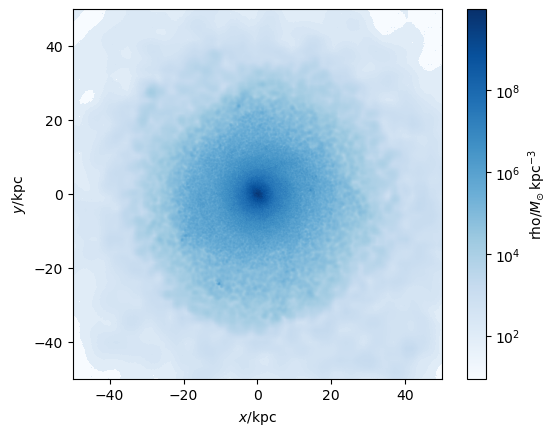

In [7]:
#Face on
pynbody.analysis.angmom.faceon(h[1])
pynbody.plot.image(h[1].s, width=100, cmap='Blues')

SimArray([[0.01271158, 0.01293213, 0.01315269, ..., 0.19394192,
           0.1943743 , 0.19480668],
          [0.01278894, 0.01301667, 0.0132444 , ..., 0.19620237,
           0.19660774, 0.19701308],
          [0.01286631, 0.01310121, 0.01333612, ..., 0.19846284,
           0.19884117, 0.1992195 ],
          ...,
          [0.13800557, 0.1401282 , 0.14225084, ..., 0.51490337,
           0.51096344, 0.5070235 ],
          [0.13836853, 0.14044923, 0.14252992, ..., 0.5118745 ,
           0.5080925 , 0.5043105 ],
          [0.1387315 , 0.14077027, 0.14280905, ..., 0.5088458 ,
           0.5052217 , 0.5015977 ]], dtype=float32, 'Msol kpc**-3')

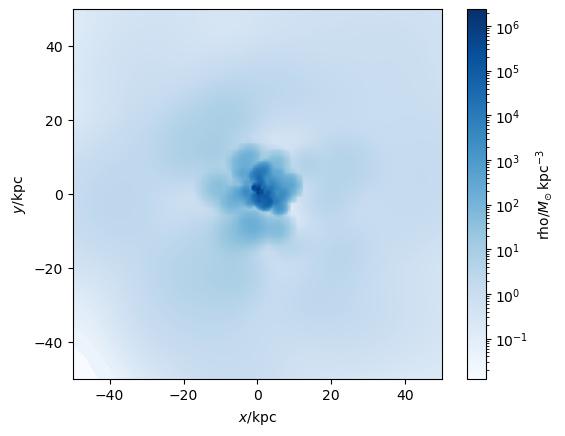

In [8]:
pynbody.analysis.halo.center(h[2],mode='hyb')
pynbody.plot.image(h[2].s, width=100, cmap='Blues')

### Profile of density and circular velocity

/tmp/ipykernel_84/2425327831.py:3: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogy()


Text(0, 0.5, '$\\Sigma$ [M$_\\odot$/ kpc$^2$]')

/home/vepe/miniconda3/envs/torch/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


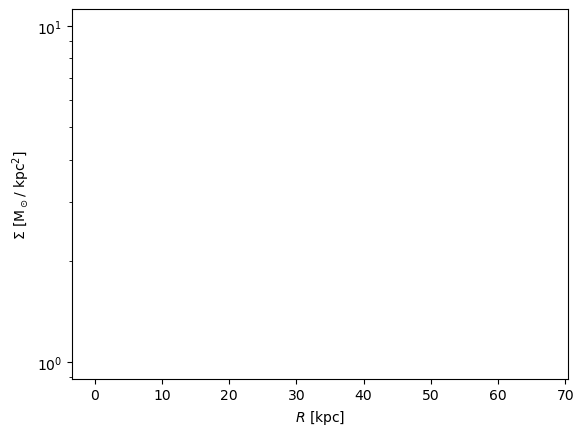

In [9]:
ps = pynbody.analysis.profile.Profile(h1.s, min = 0.01, max = 70, type = 'log')
plt.plot(ps['rbins'], ps['density'])
plt.semilogy()
plt.xlabel(r'$R$ [kpc]')
plt.ylabel(r'$\Sigma$ [M$_\odot$/ kpc$^2$]')

/tmp/ipykernel_84/528939041.py:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogy()


Text(0, 0.5, '$\\Sigma$ [M$_\\odot$ / kpc$^2$]')

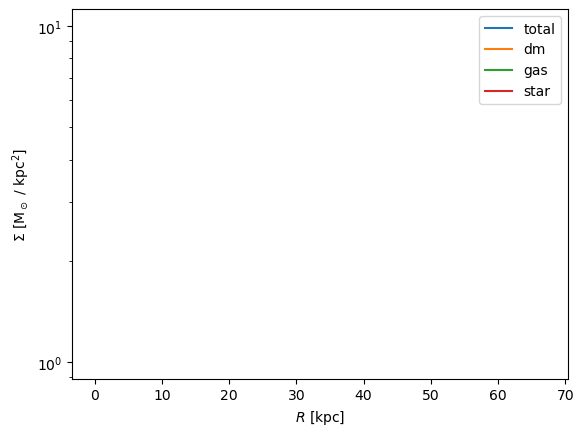

In [10]:
ps = pynbody.analysis.profile.Profile(h1.s, min=0.01, max=70, type='log')
pg = pynbody.analysis.profile.Profile(h1.g, min=0.01, max=70, type='log')
pd = pynbody.analysis.profile.Profile(h1.d, min=0.01, max=70, type='log')
p = pynbody.analysis.profile.Profile(h1, min=0.01, max=70, type='log')

for prof, name in zip([p, pd, pg, ps], ['total', 'dm', 'gas', 'star']):
    plt.plot(prof['rbins'], prof['density'], label=name)
plt.semilogy()
plt.legend()
plt.xlabel(r'$R$ [kpc]')
plt.ylabel(r'$\Sigma$ [M$_\odot$ / kpc$^2$]')

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
/tmp/ipykernel_84/1446395399.py:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogy()


Text(0, 0.5, '$V_{circ}$ [km/s]')

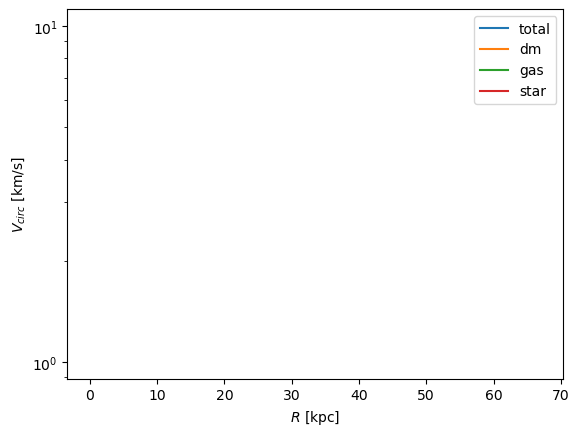

In [11]:
ps = pynbody.analysis.profile.Profile(h1.s, min=0.01, max=70, type='log')
pg = pynbody.analysis.profile.Profile(h1.g, min=0.01, max=70, type='log')
pd = pynbody.analysis.profile.Profile(h1.d, min=0.01, max=70, type='log')
p = pynbody.analysis.profile.Profile(h1, min=0.01, max=70, type='log')

for prof, name in zip([p, pd, pg, ps], ['total', 'dm', 'gas', 'star']):
    plt.plot(prof['rbins'], prof['v_circ'], label=name)
plt.semilogy()
plt.legend()
plt.xlabel(r'$R$ [kpc]')
plt.ylabel(r'$V_{circ}$ [km/s]')

3139


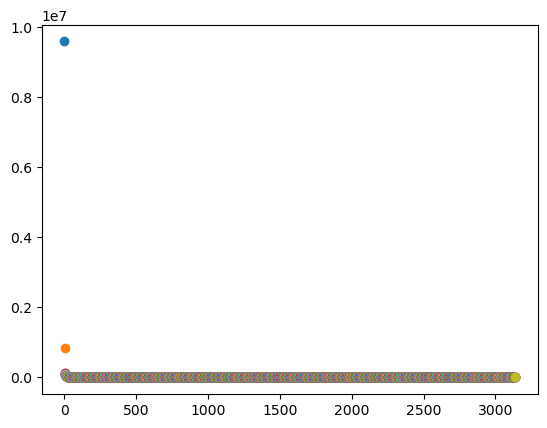

In [12]:
print(len(s.halos()))
feh_1 = h[4].s['feh']
len(feh_1)

for i, j in enumerate(s.halos()):
    plt.scatter(i, len(j))

# Distribution of the whole simulation (no distinction between different halos)

In [13]:
print(s.s.loadable_keys())

['mass', 'pos', 'timeform', 'metals', 'massform', 'OxMassFrac', 'eps', 'vel', 'FeMassFrac', 'phi', 'HI', 'tform', 'HeII', 'HeI', 'iord', 'igasorder']


In [14]:
s.derivable_keys()

['HII',
 'HeIII',
 'ne',
 'hetot',
 'hydrogen',
 'feh',
 'oxh',
 'ofe',
 'mgfe',
 'nefe',
 'sife',
 'c_s',
 'c_s_turb',
 'mjeans',
 'mjeans_turb',
 'ljeans',
 'ljeans_turb',
 'r',
 'rxy',
 'vr',
 'v2',
 'vt',
 'ke',
 'te',
 'j',
 'j2',
 'jz',
 'vrxy',
 'vcxy',
 'vphi',
 'vtheta',
 'v_mean',
 'v_disp',
 'v_curl',
 'vorticity',
 'v_div',
 'age',
 'u_mag',
 'u_lum_den',
 'b_mag',
 'b_lum_den',
 'v_mag',
 'v_lum_den',
 'r_mag',
 'r_lum_den',
 'i_mag',
 'i_lum_den',
 'j_mag',
 'j_lum_den',
 'h_mag',
 'h_lum_den',
 'k_mag',
 'k_lum_den',
 'U_mag',
 'U_lum_den',
 'B_mag',
 'B_lum_den',
 'V_mag',
 'V_lum_den',
 'R_mag',
 'R_lum_den',
 'I_mag',
 'I_lum_den',
 'J_mag',
 'J_lum_den',
 'H_mag',
 'H_lum_den',
 'K_mag',
 'K_lum_den',
 'theta',
 'alt',
 'az',
 'cs',
 'mu',
 'p',
 'u',
 'temp',
 'zeldovich_offset',
 'aform',
 'tform',
 'iord_argsort',
 'smooth',
 'rho']

In [20]:
h[1].properties.keys()

dict_keys(['omegaM0', 'omegaL0', 'h', 'boxsize', 'a', 'time', 'halo_id', 'ID', 'hostHalo', 'numSubStruct', 'mass', 'npart', 'Xc', 'Yc', 'Zc', 'VXc', 'VYc', 'VZc', 'Rvir', 'Rmax', 'r2', 'mbp_offset', 'com_offset', 'Vmax', 'v_esc', 'sigV', 'lambda', 'lambdaE', 'Lx', 'Ly', 'Lz', 'b_axis', 'c_axis', 'Eax', 'Eay', 'Eaz', 'Ebx', 'Eby', 'Ebz', 'Ecx', 'Ecy', 'Ecz', 'ovdens', 'nbins', 'fMhires', 'Ekin', 'Epot', 'SurfP', 'Phi0', 'cNFW', 'n_gas', 'M_gas', 'lambda_gas', 'lambdaE_gas', 'Lx_gas', 'Ly_gas', 'Lz_gas', 'b_gas', 'c_gas', 'Eax_gas', 'Eay_gas', 'Eaz_gas', 'Ebx_gas', 'Eby_gas', 'Ebz_gas', 'Ecx_gas', 'Ecy_gas', 'Ecz_gas', 'Ekin_gas', 'Epot_gas', 'n_star', 'M_star', 'lambda_star', 'lambdaE_star', 'Lx_star', 'Ly_star', 'Lz_star', 'b_star', 'c_star', 'Eax_star', 'Eay_star', 'Eaz_star', 'Ebx_star', 'Eby_star', 'Ebz_star', 'Ecx_star', 'Ecy_star', 'Ecz_star', 'Ekin_star', 'Epot_star', 'fstart', 'children'])

In [21]:
h[1].properties['numSubStruct']

171

In [22]:
h[1].properties['children']

[3082,
 315,
 2658,
 1001,
 2613,
 2895,
 1426,
 1514,
 2925,
 1159,
 1104,
 885,
 1134,
 572,
 2303,
 1342,
 2771,
 730,
 1942,
 2668,
 841,
 1882,
 1392,
 1294,
 1495,
 385,
 2025,
 916,
 1814,
 1778,
 1811,
 1947,
 1732,
 2872,
 696,
 2682,
 2534,
 1949,
 2593,
 257,
 3007,
 1939,
 694,
 723,
 1146,
 1381,
 444,
 892,
 610,
 2294,
 2417,
 281,
 242,
 2473,
 559,
 1430,
 2140,
 461,
 316,
 1565,
 2280,
 1261,
 931,
 1836,
 2195,
 2604,
 277,
 1255,
 2087,
 2806,
 588,
 2407,
 2400,
 1745,
 2784,
 1312,
 633,
 569,
 1038,
 1199,
 1333,
 2667,
 1965,
 218,
 1935,
 1369,
 37,
 2385,
 2569,
 1397,
 1985,
 1112,
 486,
 2282,
 211,
 119,
 1610,
 1894,
 1386,
 2601,
 829,
 2796,
 1938,
 2775,
 3138,
 2430,
 2345,
 546,
 1406,
 2853,
 1584,
 425,
 1212,
 1324,
 721,
 524,
 2126,
 2502,
 3,
 1086,
 452,
 386,
 2339,
 693,
 353,
 1709,
 2139,
 2891,
 2432,
 1149,
 1921,
 1786,
 3008,
 1250,
 804,
 2867,
 154,
 928,
 1188,
 2899,
 521,
 772,
 617,
 658,
 3096,
 1332,
 2679,
 897,
 1815,
 1826,


In [23]:
for i in h[1].properties['children']:
    print(i, len(h[i].s))

3082 0
315 0
2658 0
1001 0
2613 0
2895 0
1426 0
1514 0
2925 0
1159 0
1104 30
885 0
1134 0
572 0
2303 0
1342 0
2771 0
730 0
1942 0
2668 0
841 0
1882 0
1392 0
1294 0
1495 0
385 0
2025 0
916 0
1814 0
1778 0
1811 0
1947 0
1732 0
2872 0
696 0
2682 0
2534 0
1949 0
2593 0
257 0
3007 0
1939 0
694 0
723 0
1146 0
1381 0
444 0
892 0
610 0
2294 0
2417 0
281 0
242 0
2473 0
559 0
1430 0
2140 0
461 0
316 0
1565 0
2280 0
1261 0
931 0
1836 0
2195 0
2604 0
277 0
1255 0
2087 0
2806 0
588 0
2407 0
2400 0
1745 0
2784 0
1312 0
633 0
569 0
1038 0
1199 0
1333 0
2667 0
1965 0
218 272
1935 0
1369 0
37 605
2385 0
2569 0
1397 0
1985 0
1112 0
486 0
2282 0
211 0
119 0
1610 0
1894 0
1386 0
2601 0
829 25
2796 0
1938 0
2775 0
3138 0
2430 0
2345 0
546 0
1406 0
2853 0
1584 0
425 0
1212 0
1324 0
721 0
524 0
2126 0
2502 0
3 25214
1086 0
452 0
386 0
2339 0
693 0
353 0
1709 0
2139 0
2891 0
2432 0
1149 0
1921 0
1786 0
3008 0
1250 0
804 0
2867 0
154 0
928 0
1188 0
2899 0
521 0
772 0
617 0
658 0
3096 0
1332 0
2679 0
897 0
1815

## Fe/H O/H 
Halo Catalogue, AHF is the halo finder

In [24]:
feh = s.s['feh']
oxh = s.s['oxh']
ofe = s.s['ofe']

print(len(s.s))
print(len(feh))
print(len(oxh))

type(feh)

4235419
4235419
4235419


pynbody.array.SimArray

In [34]:
feh_array = np.array(feh)
ofe_array = np.array(ofe)

#let's take the 99.9 percentile 
percentile_feh = np.percentile(feh_array, 0.1)
percentile_ofe = np.percentile(ofe_array, 0.1)
print(percentile_feh)
print(percentile_ofe)

-2.797880438439376
-0.21588536858558655


In [35]:
df = pandas.DataFrame(data=(zip(feh_array[feh_array>percentile_feh], ofe_array[ofe_array>percentile_ofe])),
                  columns= ['Fe/H', 'O/Fe'])

Text(0.5, 0, 'O/Fe')

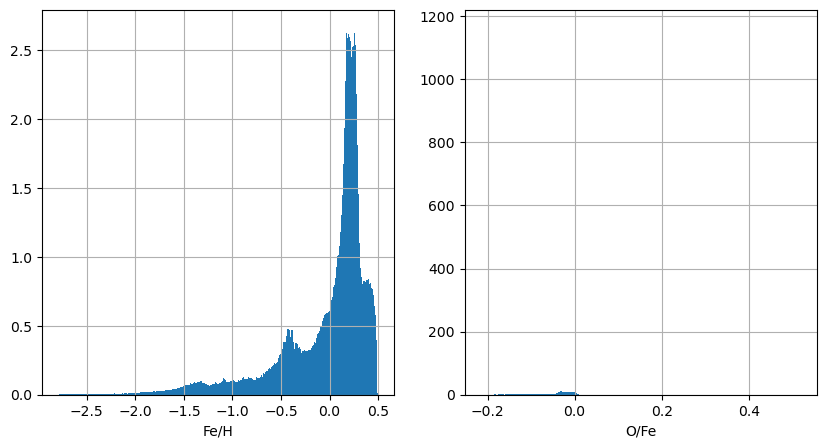

In [36]:
fig, (ax0, ax1)= plt.subplots(figsize=(10,5), nrows=1, ncols=2)
df['Fe/H'].hist(ax=ax0, bins = int(np.sqrt(len(df['Fe/H']))), density=True)
ax0.set_xlabel('Fe/H')

df['O/Fe'].hist(ax=ax1, bins = int(np.sqrt(len(df['O/Fe']))), density=True)
ax1.set_xlabel('O/Fe')

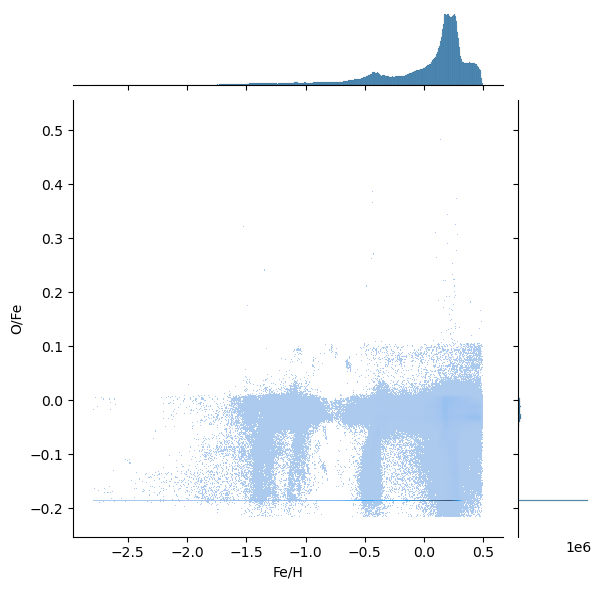

In [37]:
sns.jointplot(data=df, x='Fe/H', y='O/Fe', kind='hist')

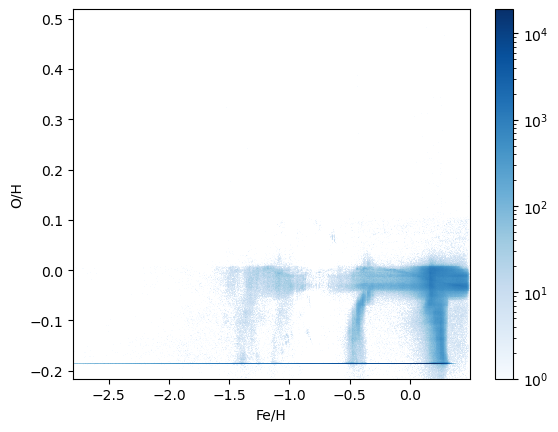

In [38]:
plt.hist2d(df['Fe/H'], df['O/Fe'], bins=(500, 500), norm=matplotlib.colors.LogNorm(), cmap='Blues')
plt.colorbar()
plt.xlabel('Fe/H')
plt.ylabel('O/H')
plt.show()

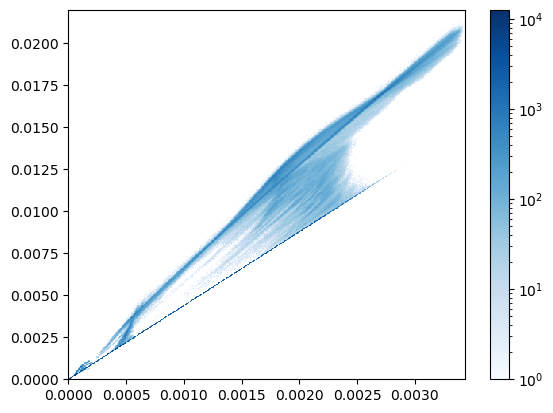

In [14]:
plt.hist2d(h[1].s['FeMassFrac'], h[1].s['OxMassFrac'], bins=(500, 500), norm=matplotlib.colors.LogNorm(), cmap='Blues')
plt.colorbar()

## Masform timeform

In [21]:
mass_form = s.s['massform']
time_form = s.s['timeform']

Text(0, 0.5, 'mass form')

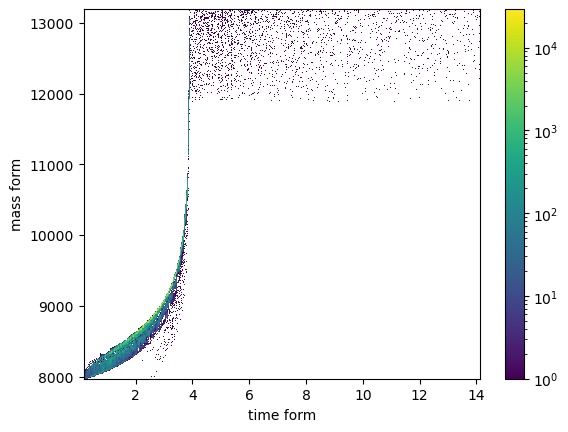

In [25]:
plt.hist2d(time_form, mass_form, bins=(500, 500), norm=matplotlib.colors.LogNorm());
plt.colorbar()
plt.xlabel('time form')
plt.ylabel('mass form')